In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# # Interactive plots
# %matplotlib notebook

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

TensorFlow version is 2.1.0


Using TensorFlow backend.


## Study the model activations

In [3]:
X, Y, info = mypackage.Dataset.load("../data/tomra", only_with_contaminant=True)

enlarged_X, enlarged_Y = mypackage.Dataset.make_zoomed_in_dataset(X, Y, size=32, sample_multiplication=7, contaminant_type=3)

X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(enlarged_X, enlarged_Y, testRatio=0.3)

# X_test, X_train, _ = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# # X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=3, plot=True, whiten=True)

print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape, X_train.shape)

[1. 2. 3.] (51, 32, 32, 1) (1.5502803325653076, 73.80110931396484) (51, 32, 32, 208) (117, 32, 32, 208)


c4: (None, 4, 4, 64)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10088
           1       0.98      0.97      0.98     36363
           2       0.89      0.92      0.91      5773

    accuracy                           0.97     52224
   macro avg       0.94      0.96      0.95     52224
weighted avg       0.97      0.97      0.97     52224



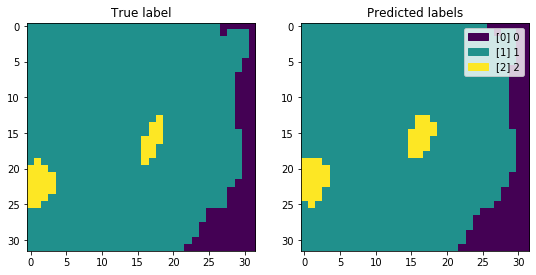

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 208, 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 32, 32, 70, 8 512         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 70, 8 32          conv3d[0][0]                     
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 16, 16, 24, 1 5776        batch_normalization[0][0]        
______________________________________________________________________________________________

In [4]:
unet = mypackage.MyUnet.UNet(X_train, Y_train, saved_mode_name="../best-model.hdf5")
unet.predict(X_test, Y_labels=Y_test) # Use this to load the previously trained weigths into the model

model = unet.model
model.summary()

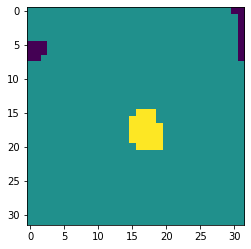

In [5]:
plt.figure()
plt.imshow(np.squeeze(Y_test[0:1]))

In [6]:
for layer in model._layers:
    print(layer.name)

input_1
conv3d
batch_normalization
conv3d_1
batch_normalization_1
conv3d_2
batch_normalization_2
reshape
conv2d_1
batch_normalization_4
activation_1
dropout
conv2d_3
batch_normalization_6
activation_3
conv2d_transpose
concatenate
dropout_1
conv2d_5
batch_normalization_8
activation_5
average_pooling3d
conv2d_transpose_1
reshape_1
concatenate_1
dropout_2
conv2d_7
batch_normalization_10
activation_7
average_pooling3d_1
conv2d_transpose_2
reshape_2
concatenate_2
dropout_3
conv2d_9
batch_normalization_12
activation_9
average_pooling3d_2
conv2d_transpose_3
reshape_3
concatenate_3
dropout_4
conv2d_11
batch_normalization_14
activation_11
conv2d_12


In [13]:
import tf_explain
from tf_explain.core import GradCAM

data = X_test[0:1]
data = (np.reshape(data, (*data.shape, 1)), Y_test[0:1])

# Start explainer
explainer = GradCAM()
grid = explainer.explain(data, model, class_index=2, layer_name="conv3d")  # 2 is the tabby cat index in ImageNet

# explainer.save(grid, ".", "grad_cam.png")
grid.shape

(32, 32, 70)

<IPython.core.display.Javascript object>


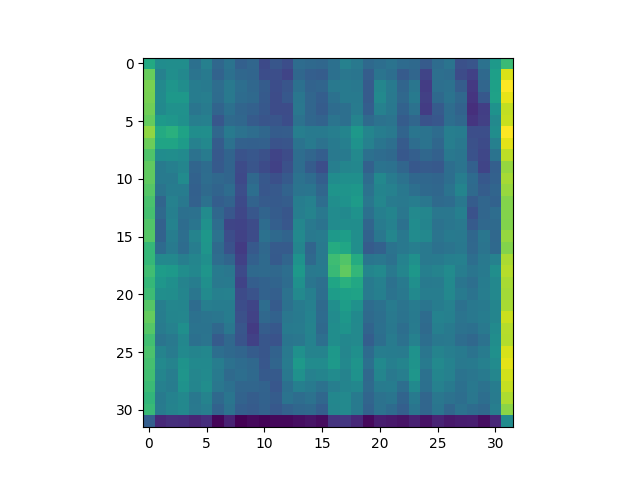

<IPython.core.display.Javascript object>


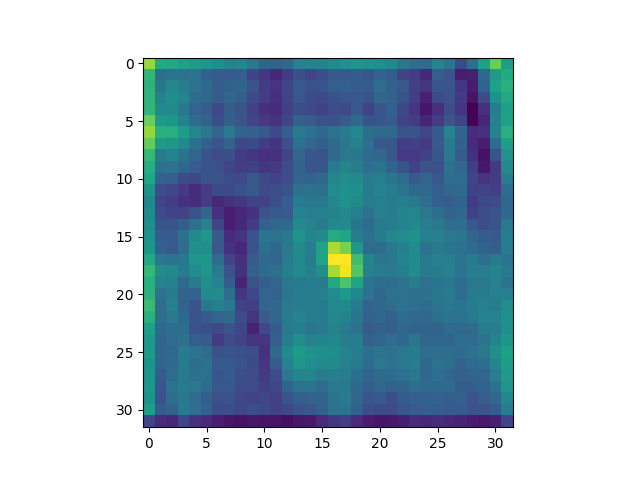

<IPython.core.display.Javascript object>


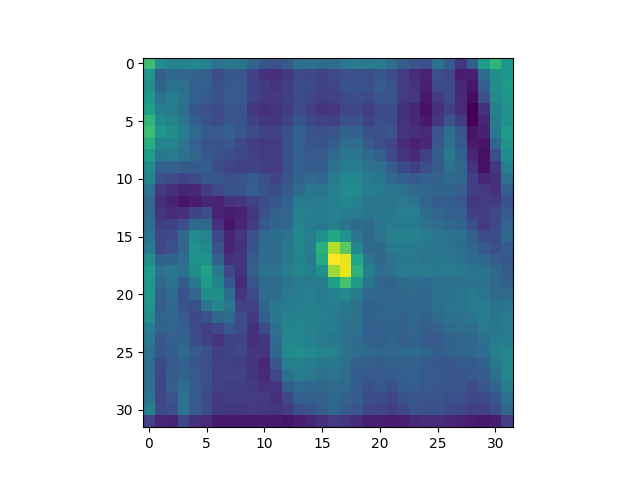

<IPython.core.display.Javascript object>


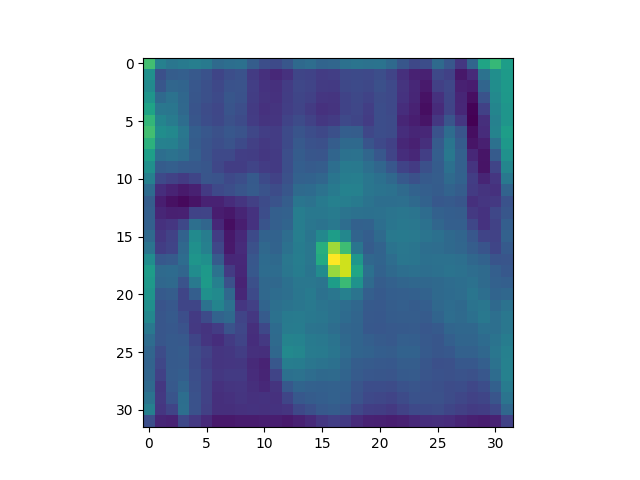

<IPython.core.display.Javascript object>


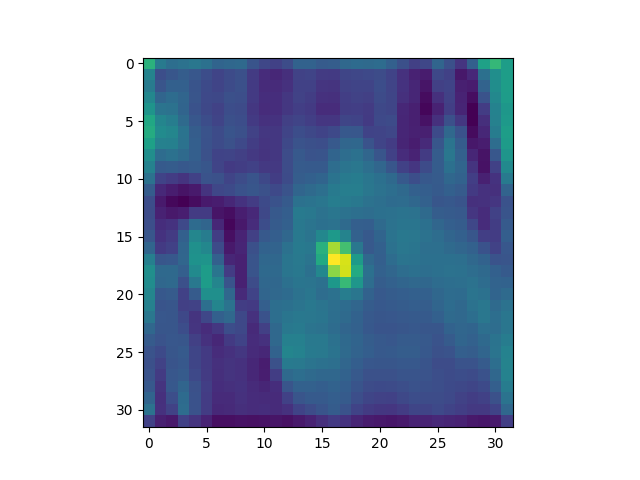

<IPython.core.display.Javascript object>


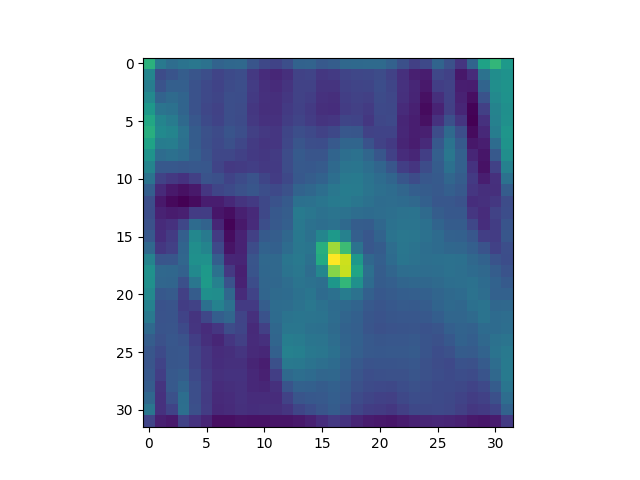

<IPython.core.display.Javascript object>


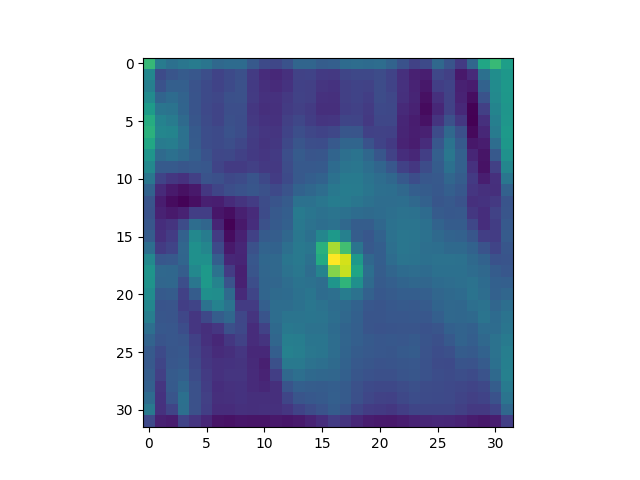

<IPython.core.display.Javascript object>


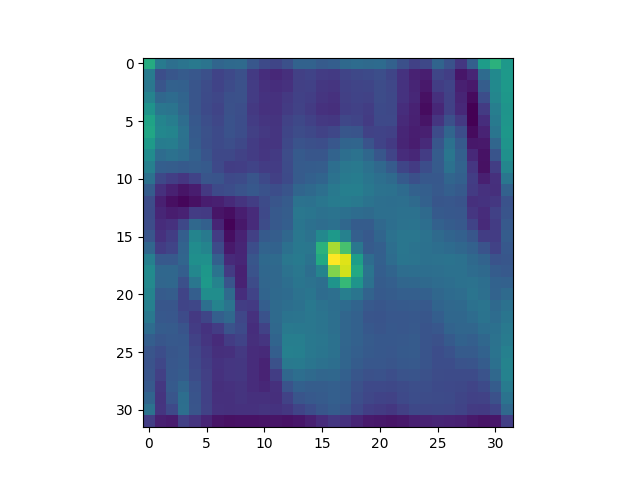

<IPython.core.display.Javascript object>


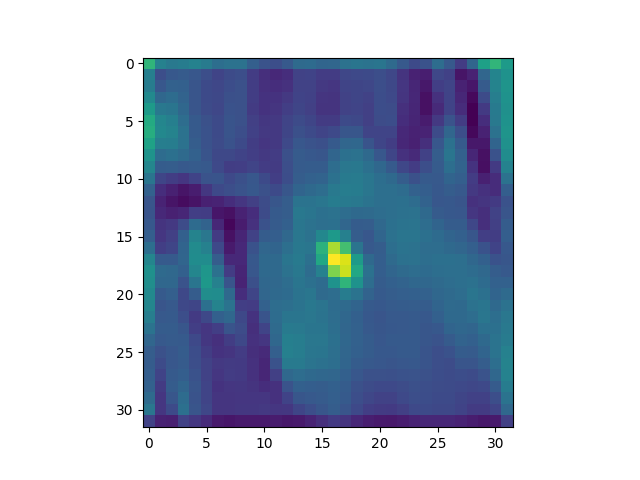

<IPython.core.display.Javascript object>


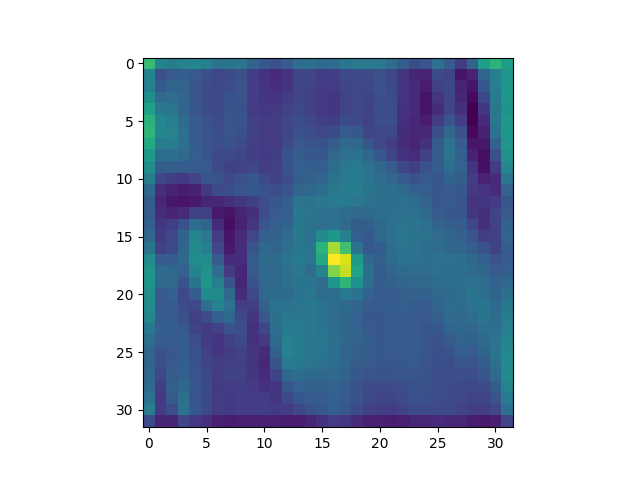

<IPython.core.display.Javascript object>


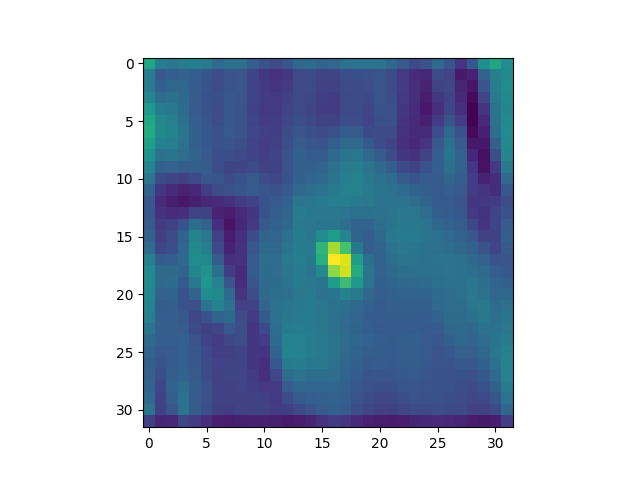

<IPython.core.display.Javascript object>


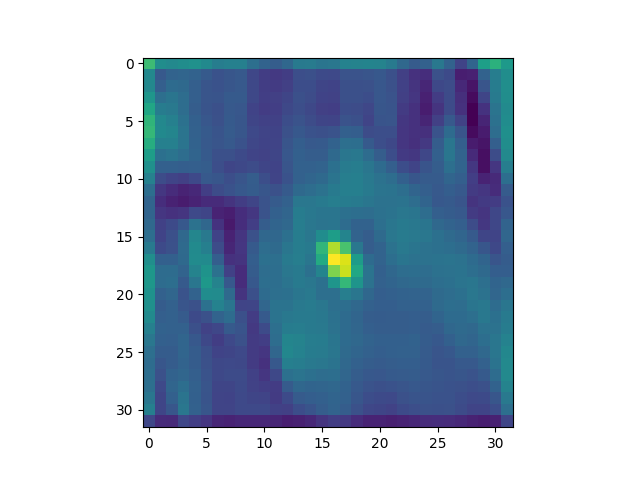

<IPython.core.display.Javascript object>


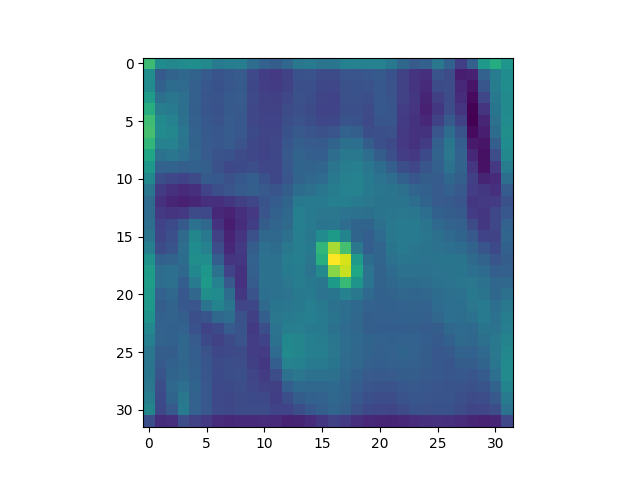

<IPython.core.display.Javascript object>


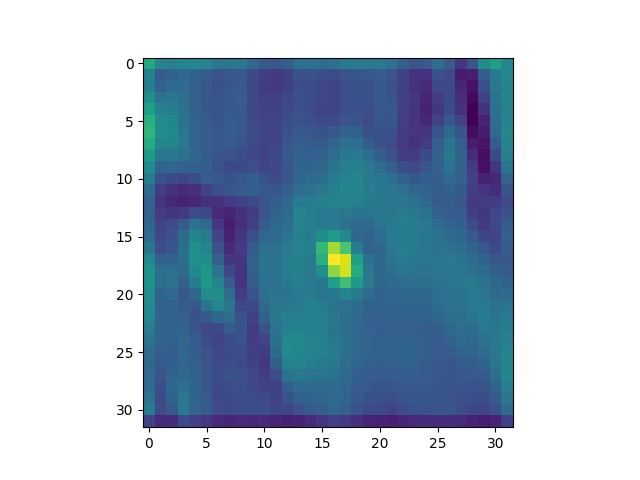

<IPython.core.display.Javascript object>


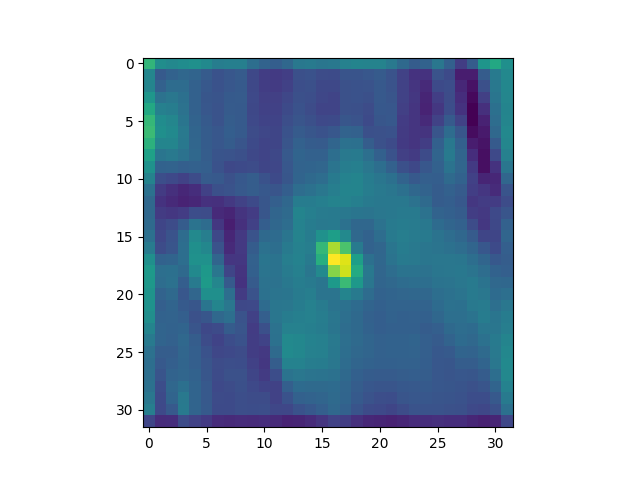

<IPython.core.display.Javascript object>


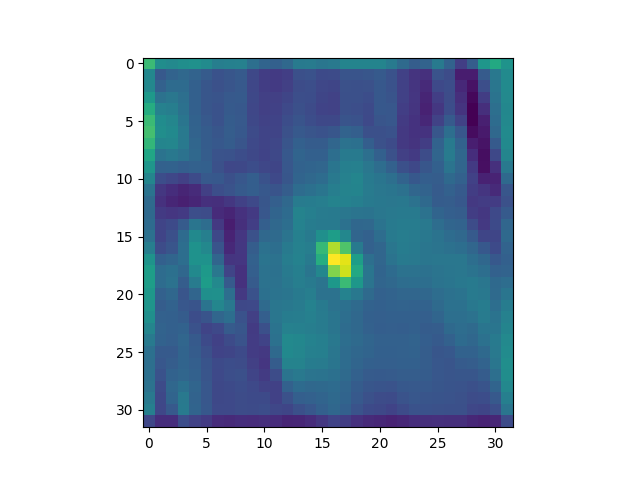

<IPython.core.display.Javascript object>


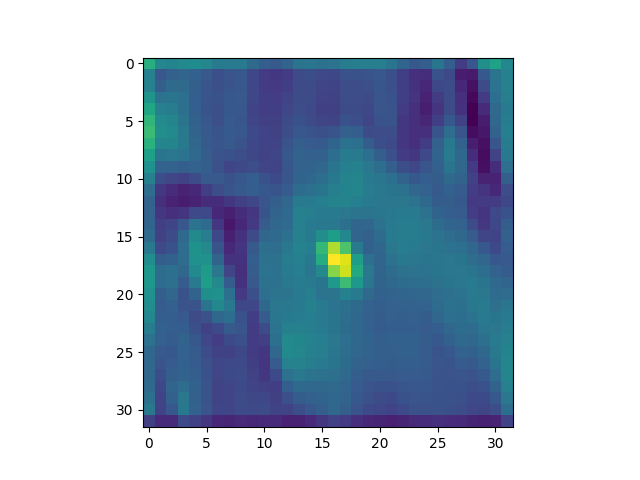

<IPython.core.display.Javascript object>


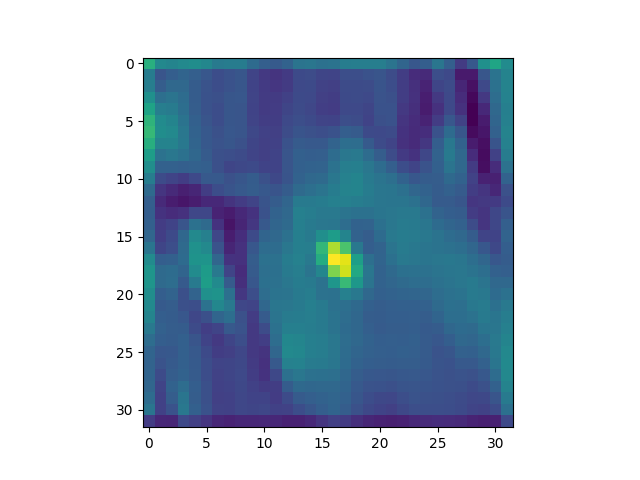

<IPython.core.display.Javascript object>


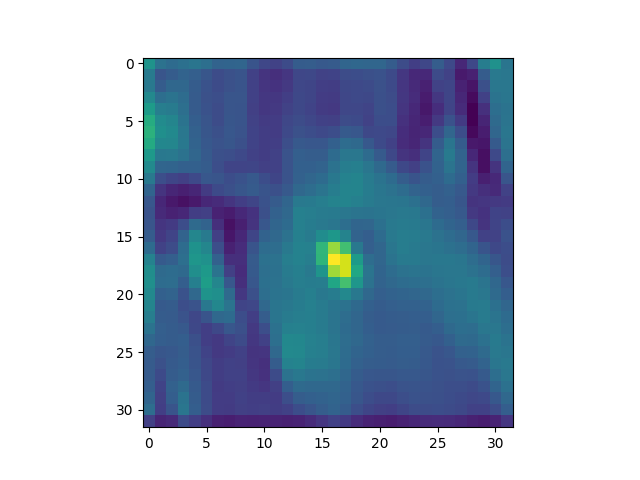

<IPython.core.display.Javascript object>


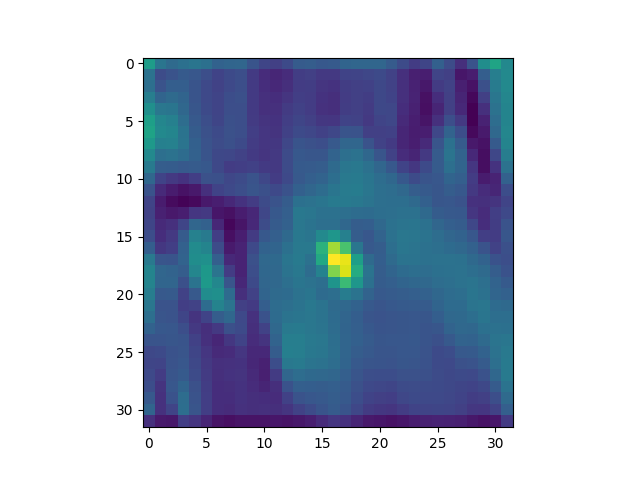

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


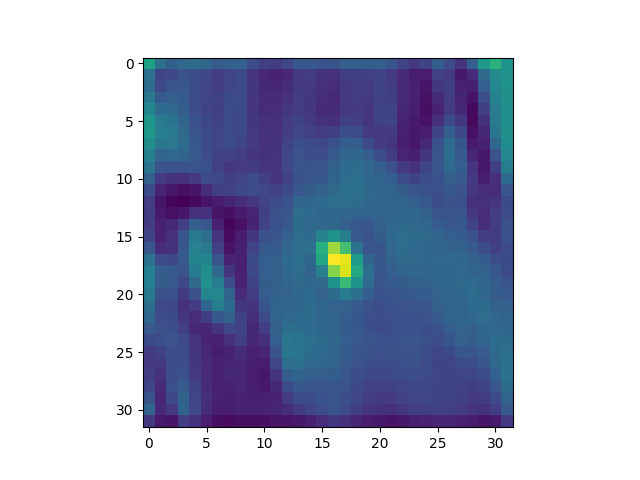

<IPython.core.display.Javascript object>


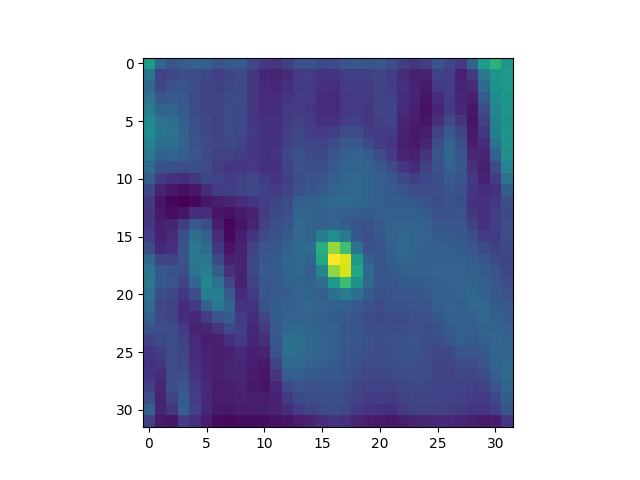

<IPython.core.display.Javascript object>


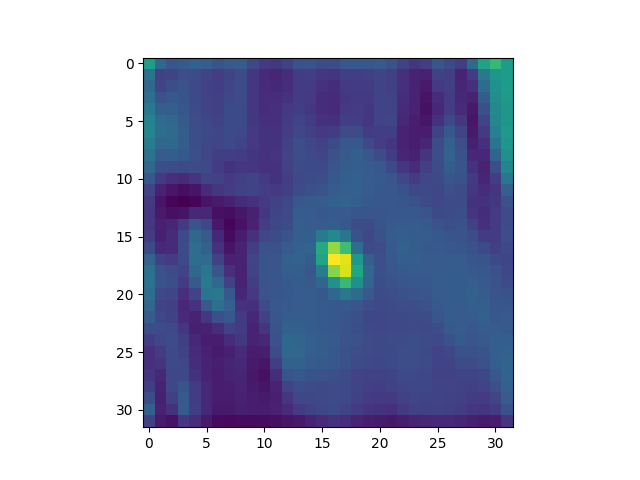

<IPython.core.display.Javascript object>


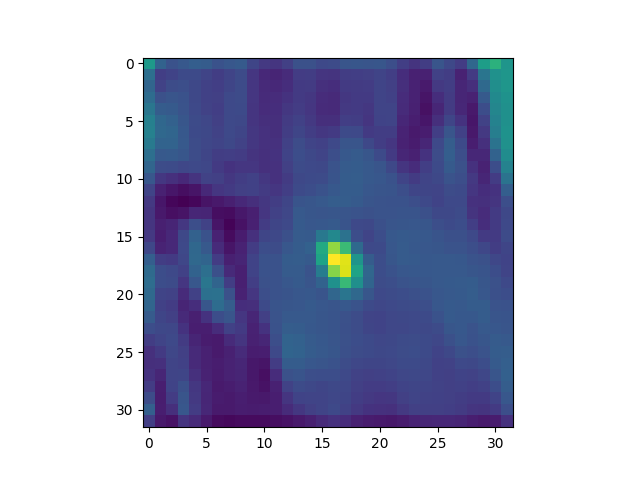

<IPython.core.display.Javascript object>


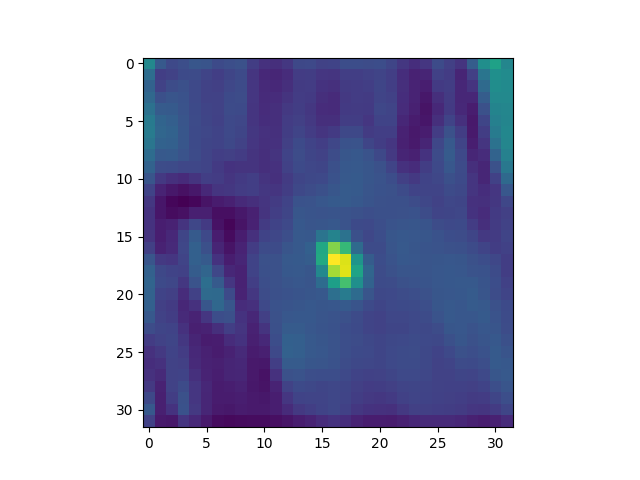

<IPython.core.display.Javascript object>


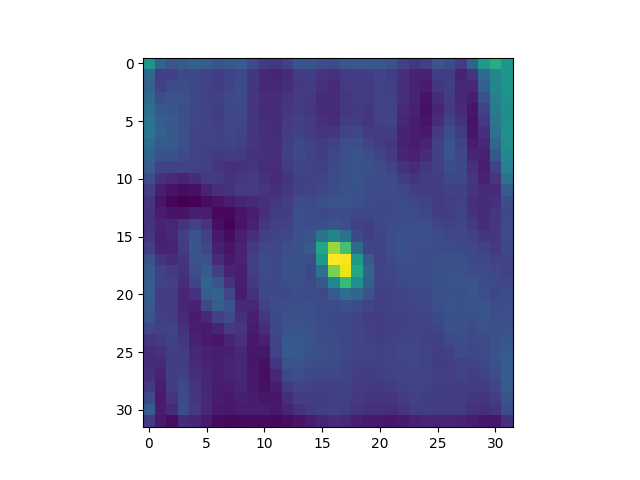

<IPython.core.display.Javascript object>


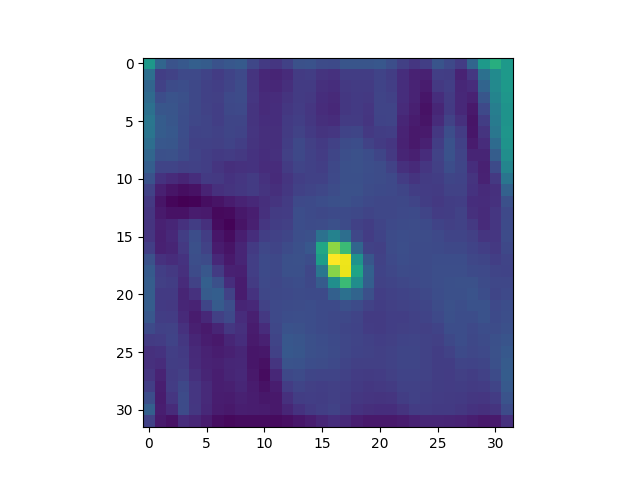

<IPython.core.display.Javascript object>


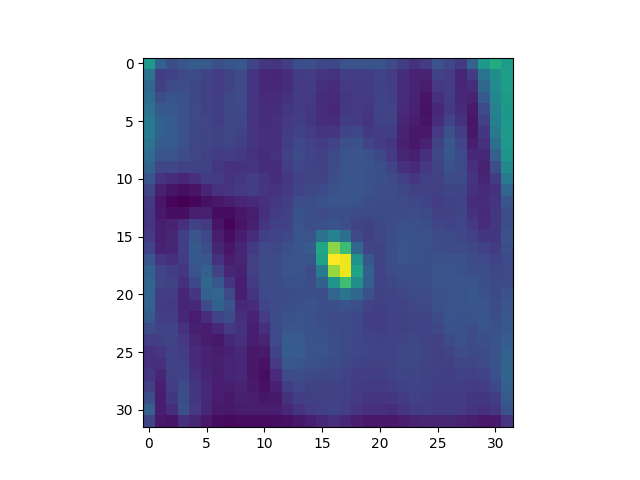

<IPython.core.display.Javascript object>


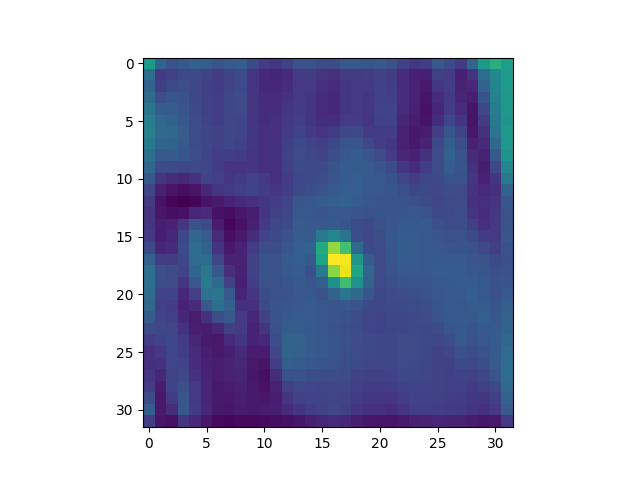

<IPython.core.display.Javascript object>


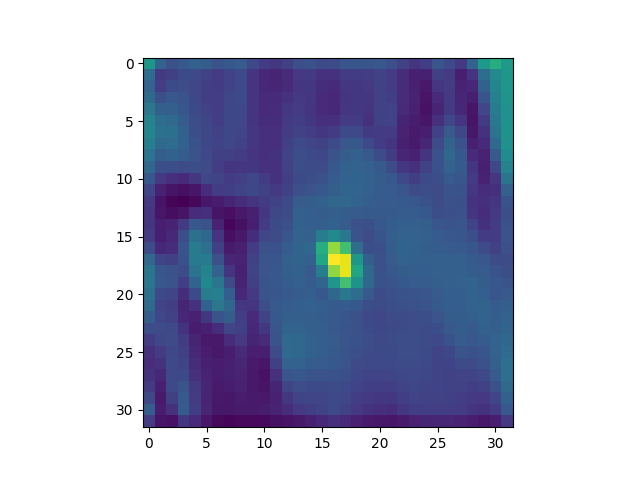

<IPython.core.display.Javascript object>


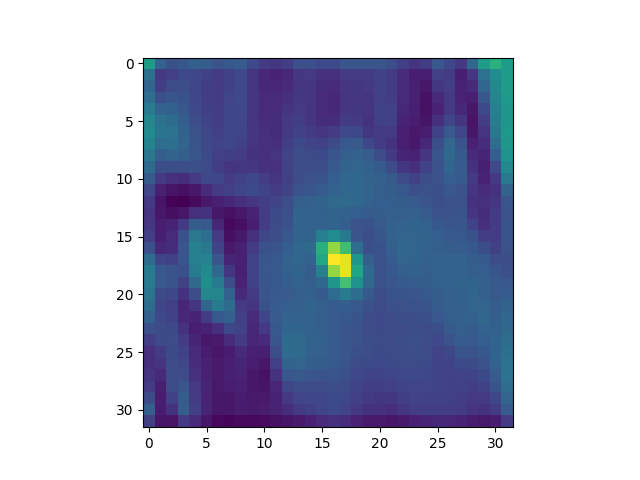

<IPython.core.display.Javascript object>


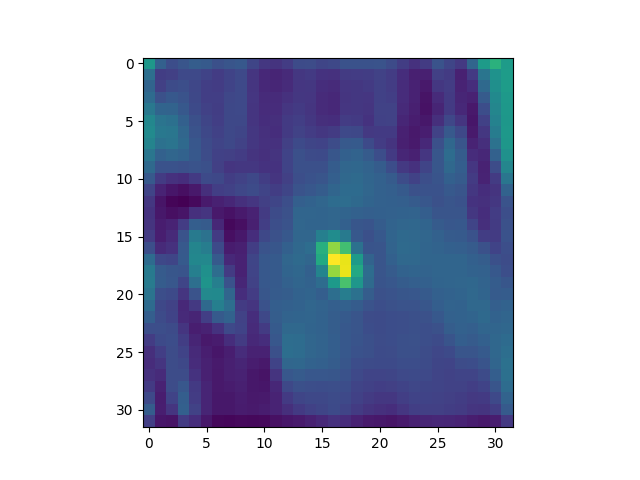

<IPython.core.display.Javascript object>


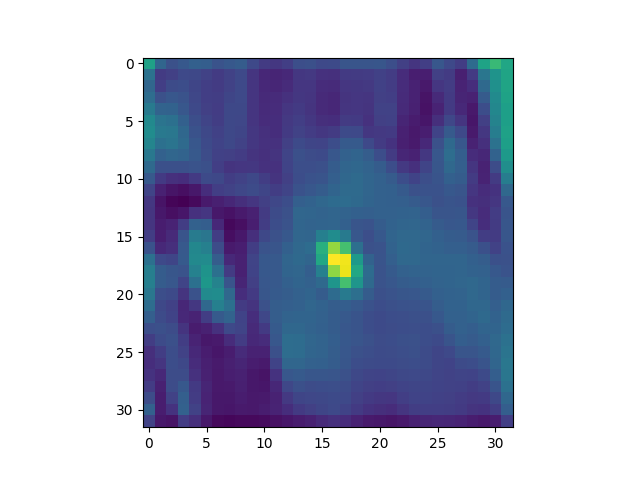

<IPython.core.display.Javascript object>


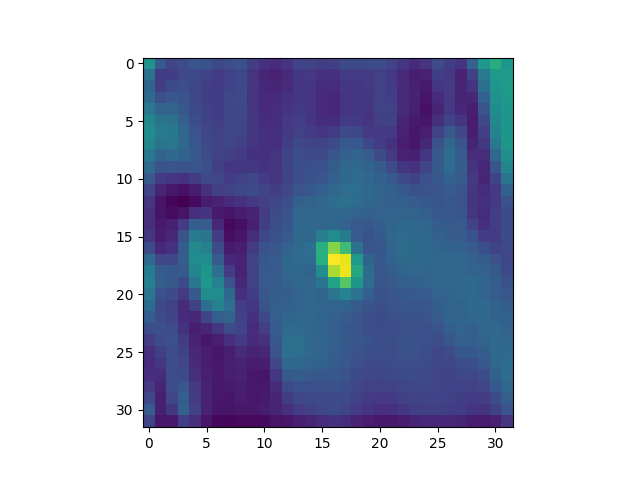

<IPython.core.display.Javascript object>


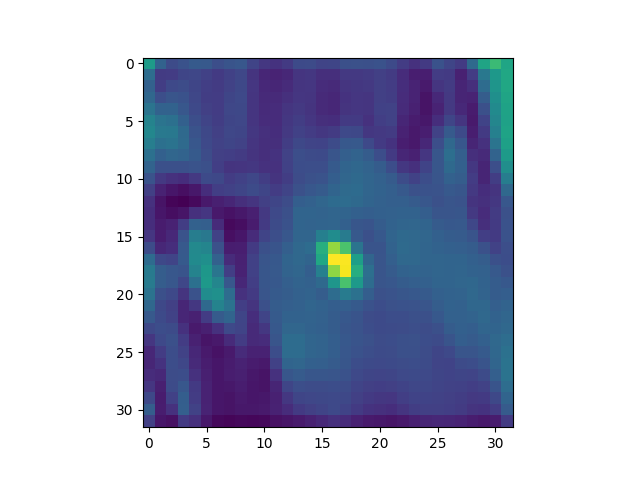

<IPython.core.display.Javascript object>


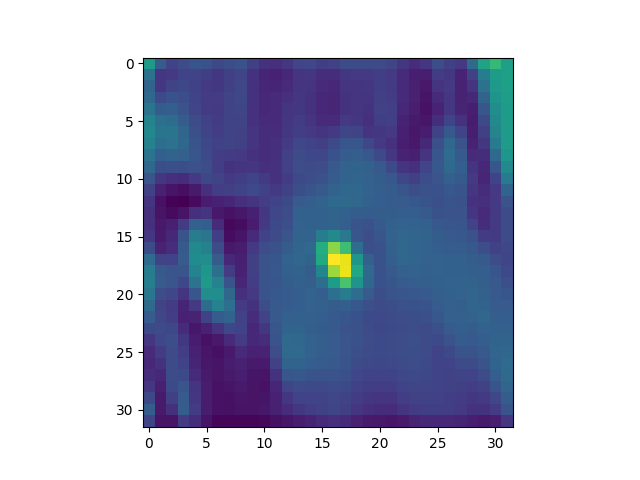

<IPython.core.display.Javascript object>


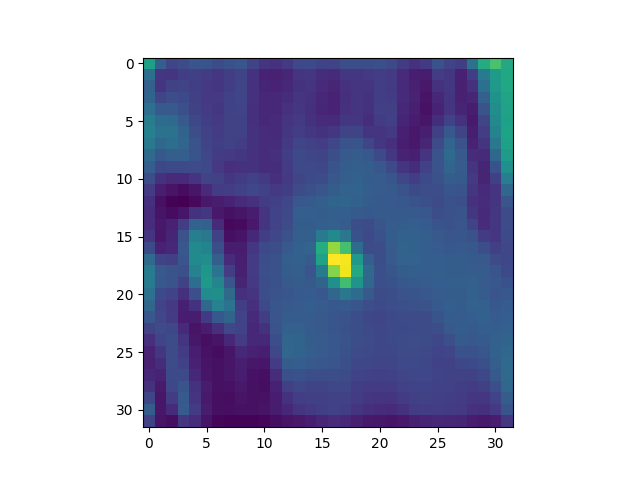

<IPython.core.display.Javascript object>


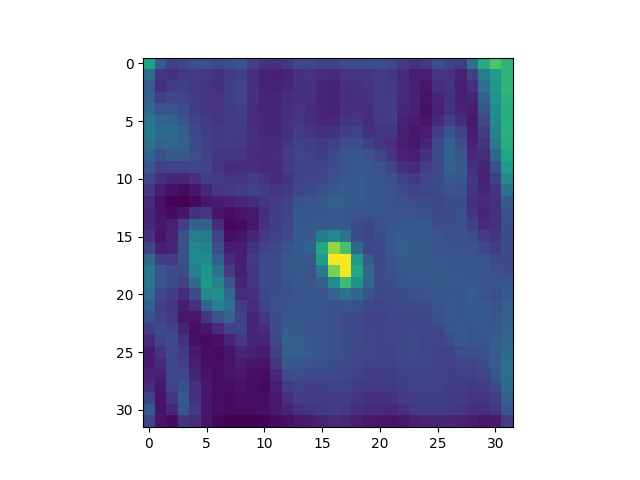

<IPython.core.display.Javascript object>


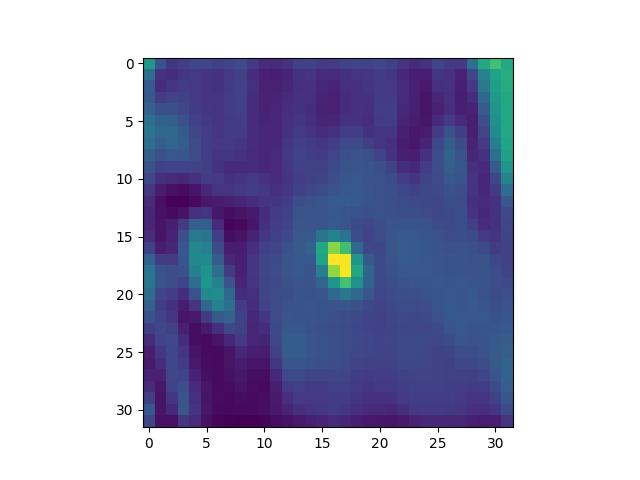

<IPython.core.display.Javascript object>


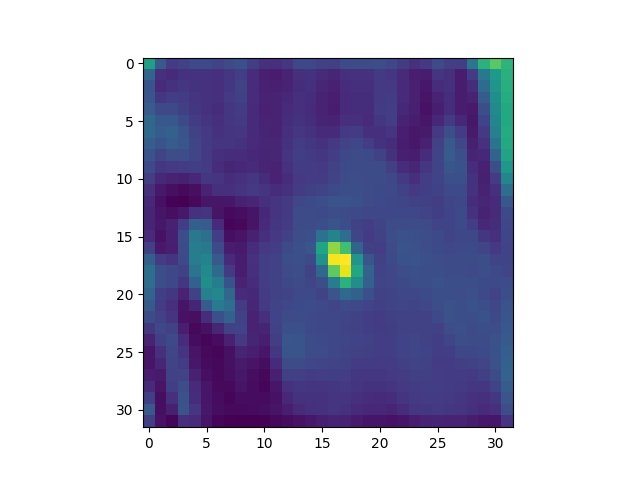

<IPython.core.display.Javascript object>


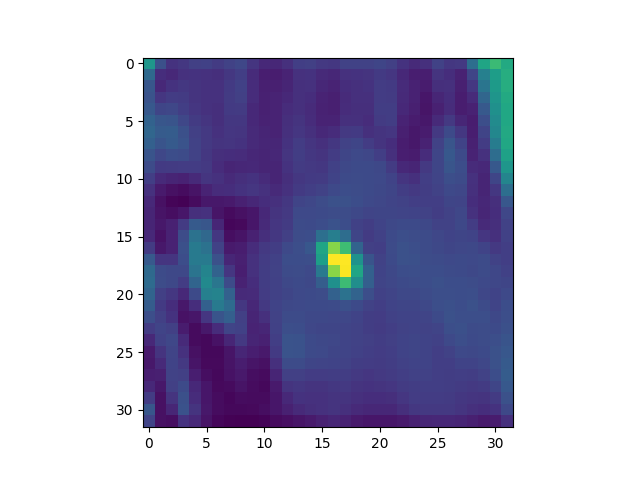

<IPython.core.display.Javascript object>


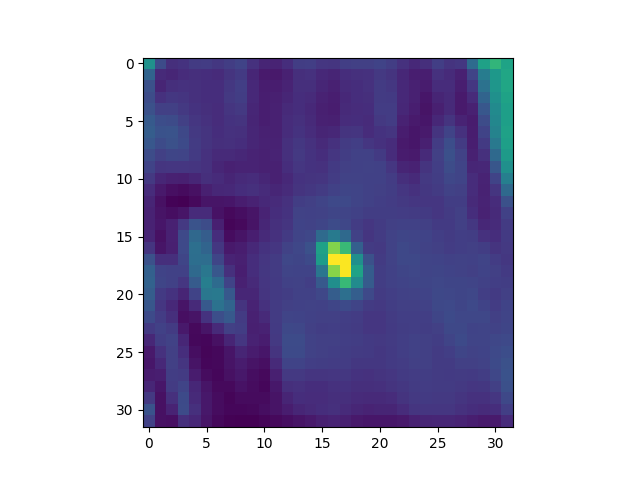

<IPython.core.display.Javascript object>


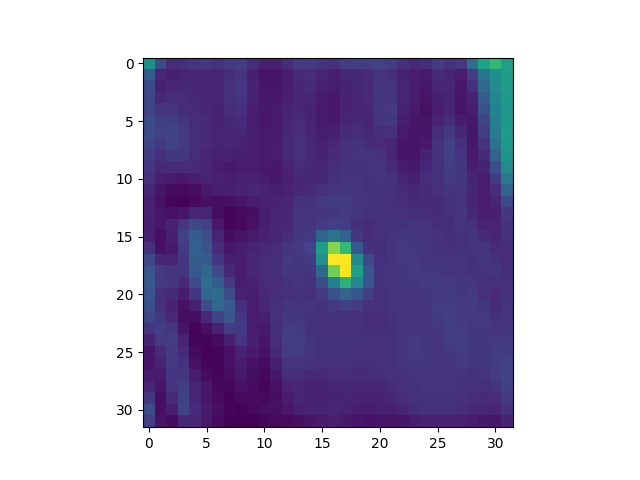

<IPython.core.display.Javascript object>


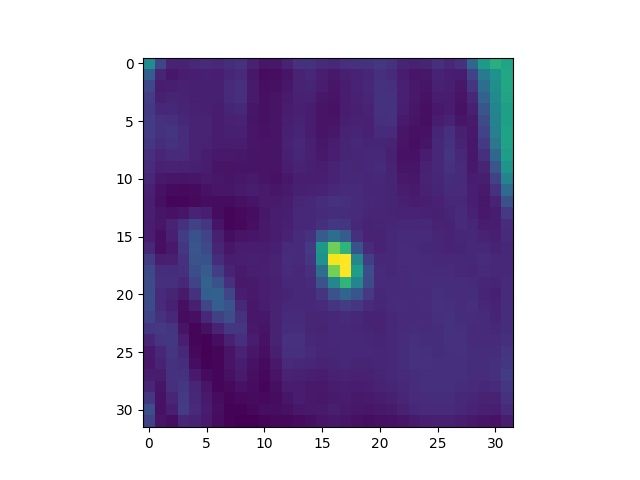

<IPython.core.display.Javascript object>


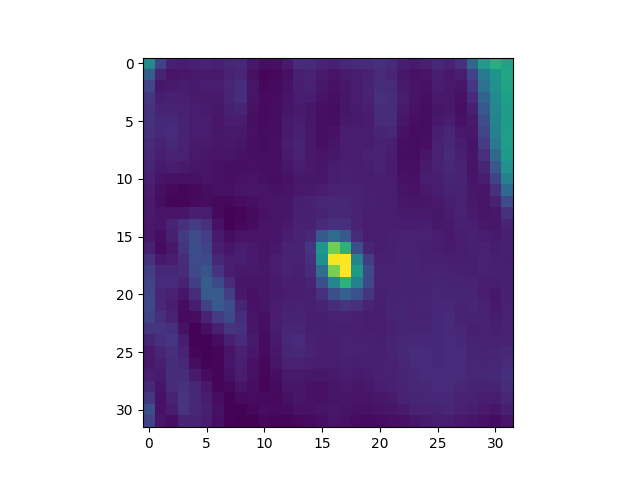

<IPython.core.display.Javascript object>


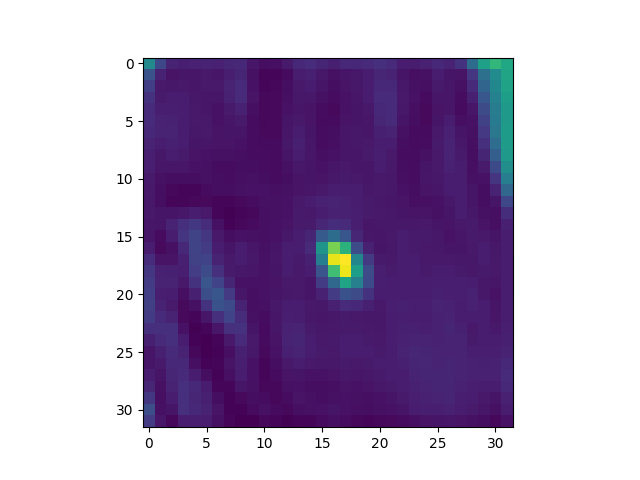

<IPython.core.display.Javascript object>


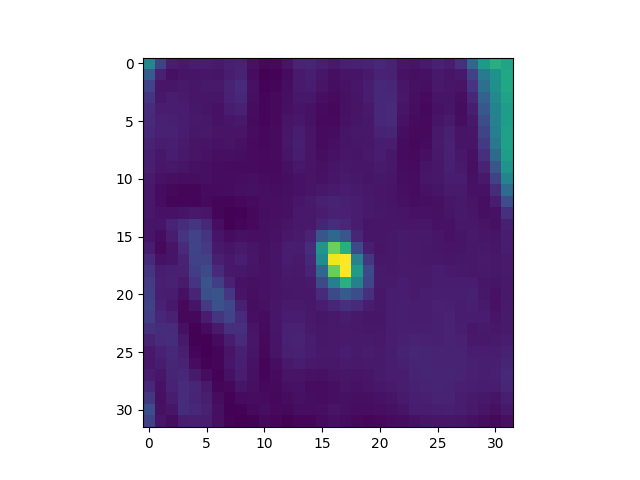

<IPython.core.display.Javascript object>


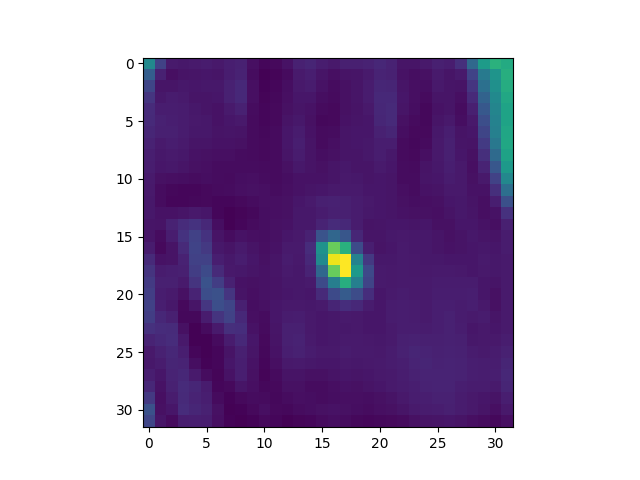

<IPython.core.display.Javascript object>


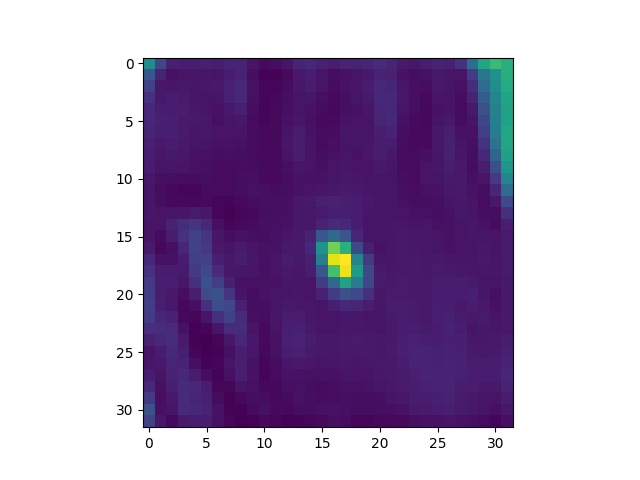

<IPython.core.display.Javascript object>


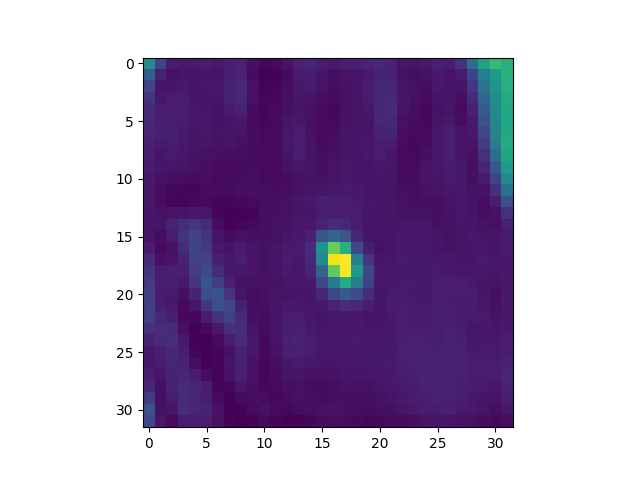

<IPython.core.display.Javascript object>


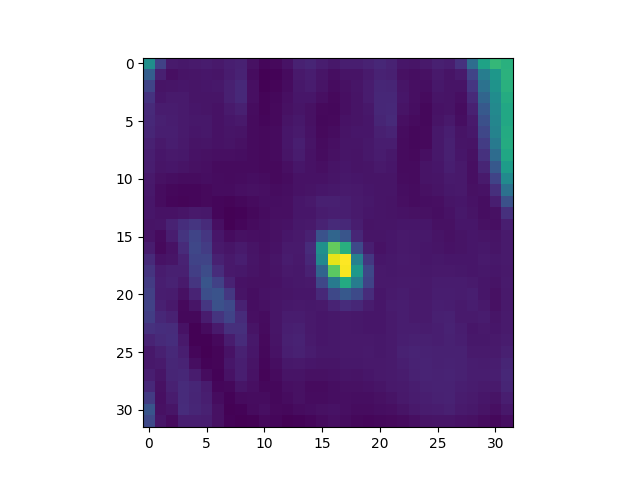

<IPython.core.display.Javascript object>


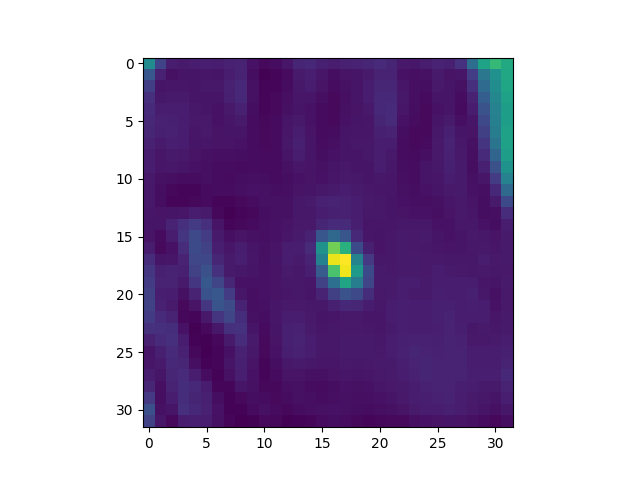

<IPython.core.display.Javascript object>


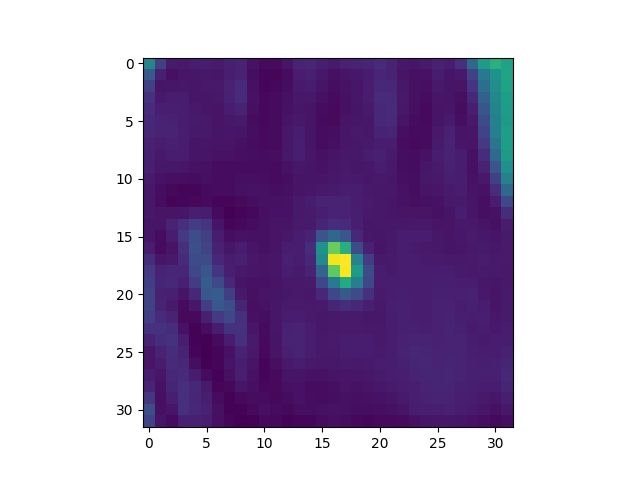

<IPython.core.display.Javascript object>


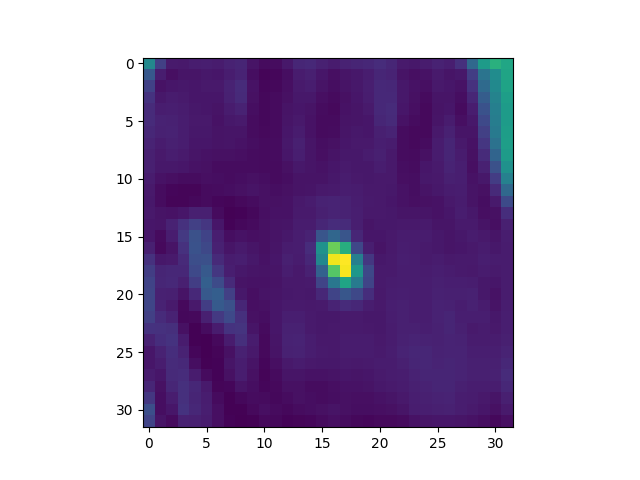

<IPython.core.display.Javascript object>


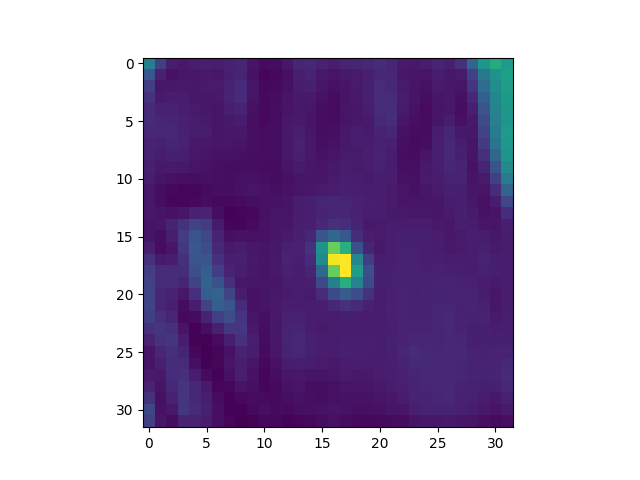

<IPython.core.display.Javascript object>


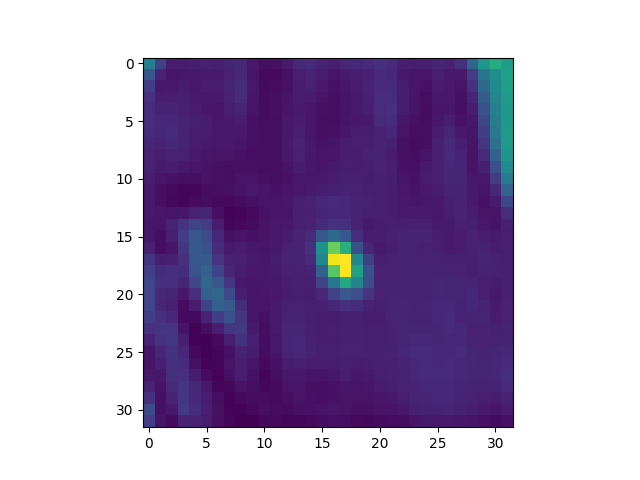

<IPython.core.display.Javascript object>


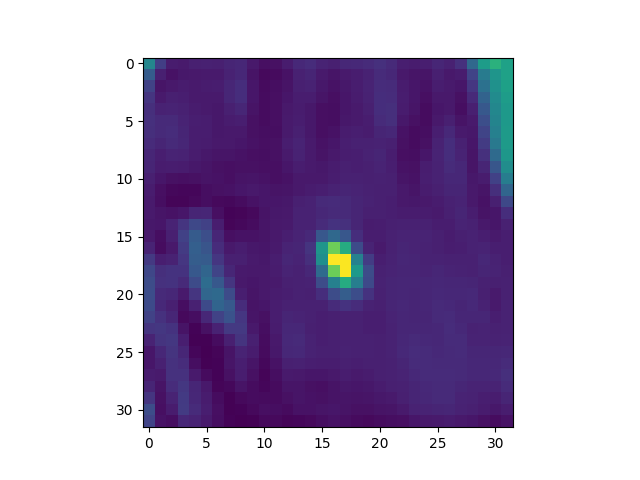

<IPython.core.display.Javascript object>


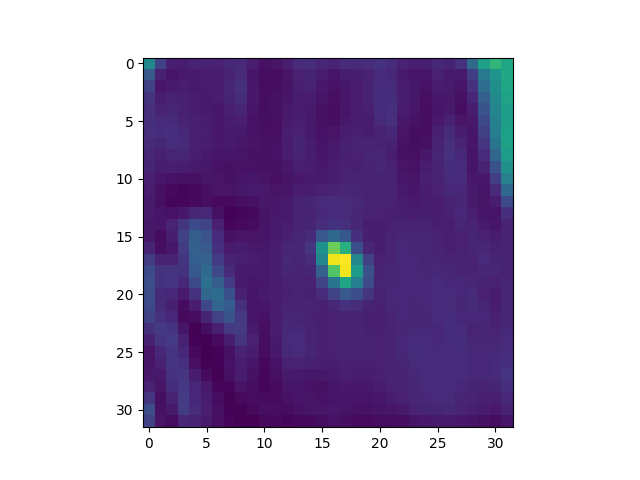

<IPython.core.display.Javascript object>


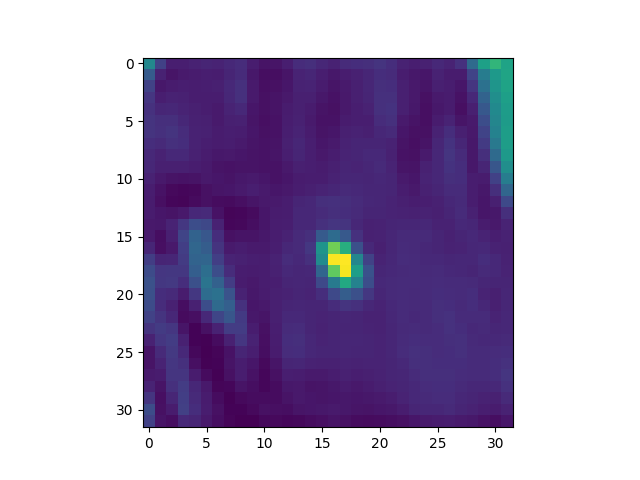

<IPython.core.display.Javascript object>


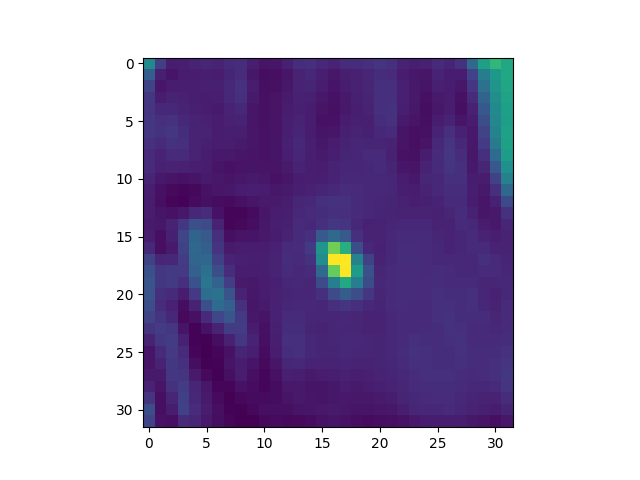

<IPython.core.display.Javascript object>


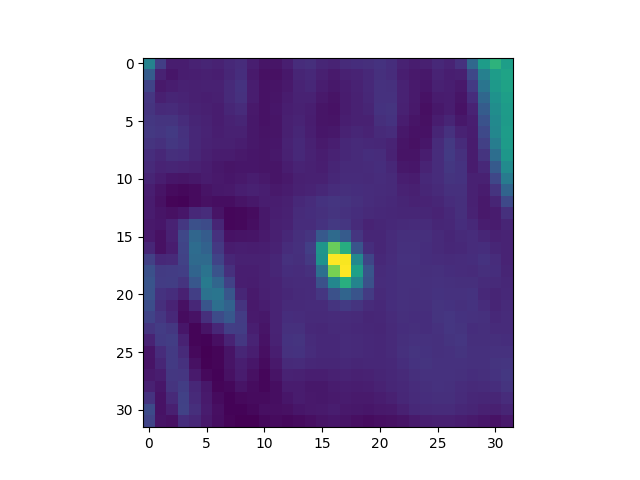

<IPython.core.display.Javascript object>


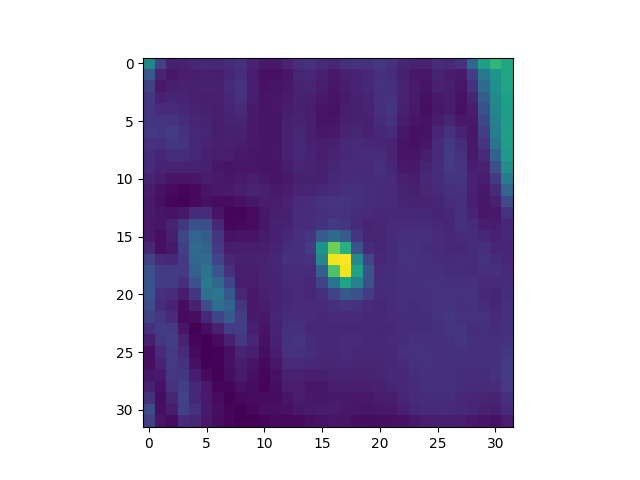

<IPython.core.display.Javascript object>


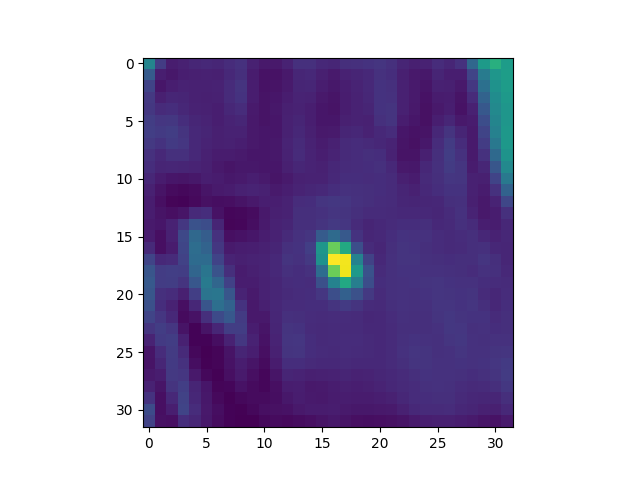

<IPython.core.display.Javascript object>


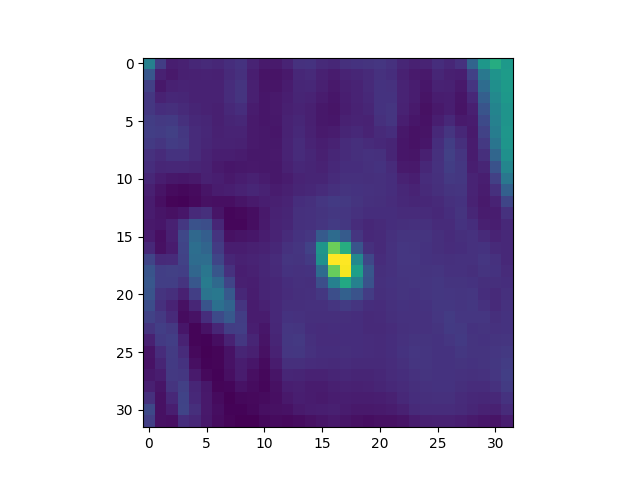

<IPython.core.display.Javascript object>


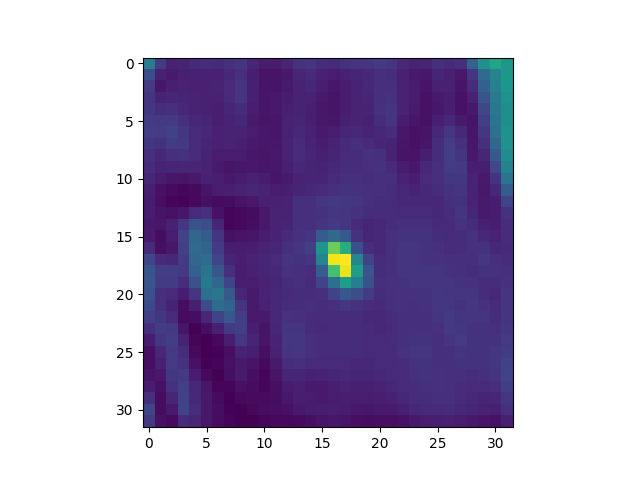

<IPython.core.display.Javascript object>


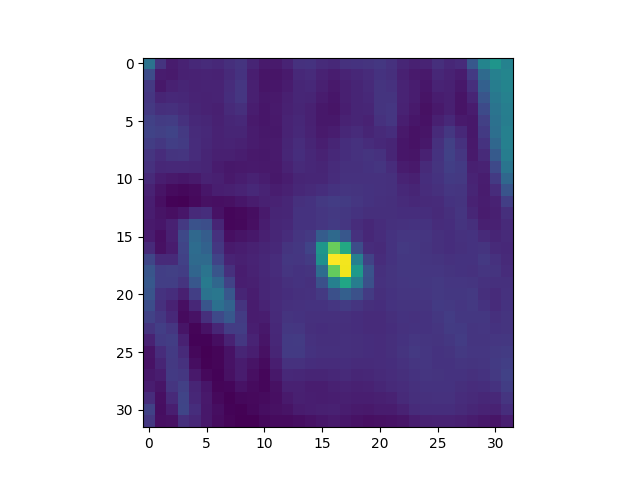

<IPython.core.display.Javascript object>


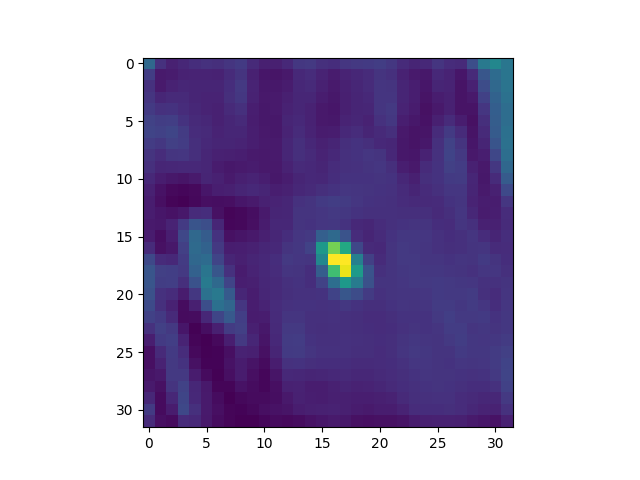

<IPython.core.display.Javascript object>


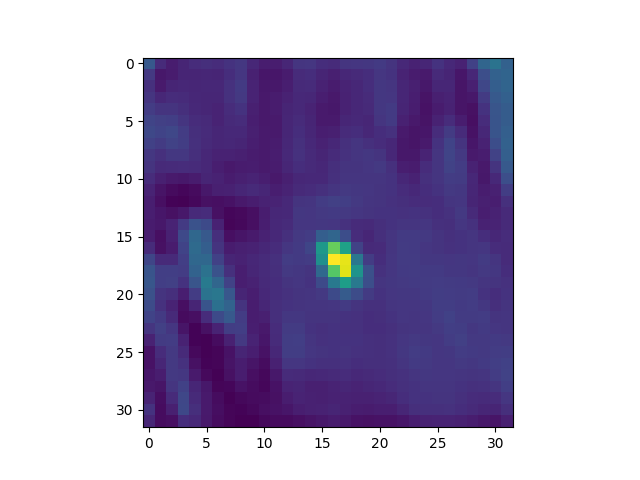

<IPython.core.display.Javascript object>


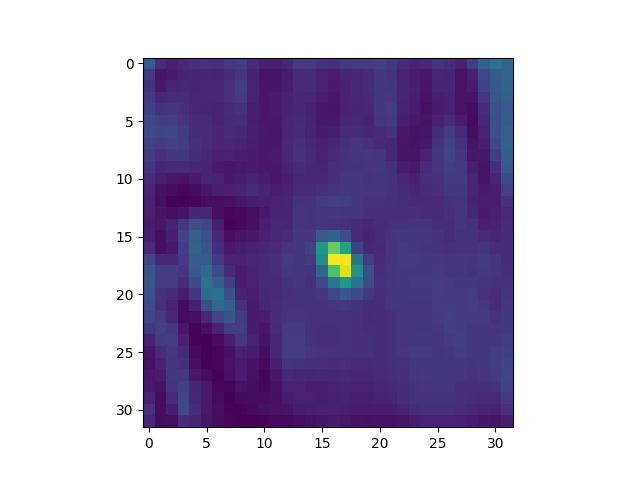

<IPython.core.display.Javascript object>


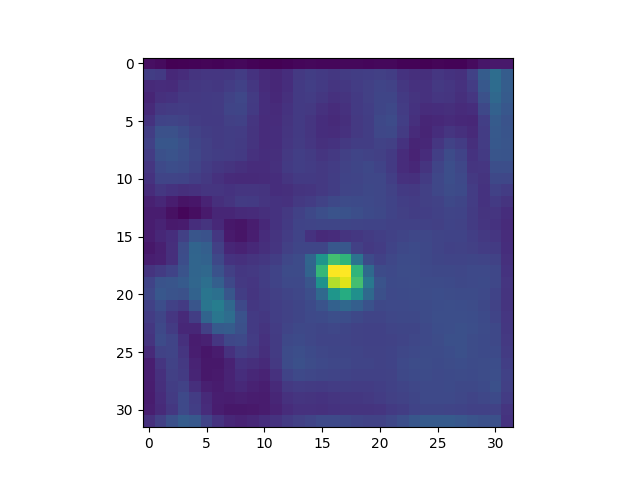

In [14]:
%matplotlib notebook

# plt.figure()
# plt.imshow(grid)
for i in range(grid.shape[-1]):
    plt.figure()
    plt.imshow(grid[:, :, i])

The similarity between images in all the 3D convolution layers indicates that the downsampling could have been much more aggressive, and thus smallar net could be achived.